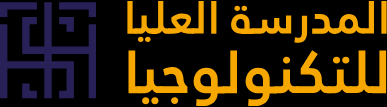
### Higher School of Technology

# 📚 Machine Learning on Financial Data
**Prerequisites**

[Data Types in Data Science for Financial Analysis](Day2.ipynb)

Machine learning plays a transformative role in financial data analysis by enabling automated decision-making and predictive modeling; classification algorithms like Decision Trees and SVMs are widely used to identify patterns and categorize financial records—such as credit approval, fraud detection, or risk profiling—based on historical features, while regression models utilizing the same techniques help forecast continuous variables like stock prices, interest rates, or portfolio returns, allowing institutions to anticipate market trends and optimize strategies with improved accuracy and efficiency.

This notebook introduces the application of machine learning algorithms to the two types of financial data :
- Classification on tabular data,
- Regresion on time series data.

To perform both classification and regression tasks. Specifically, it demonstrates how models like Decision Trees and Support Vector Machines (SVMs) can be applied to structured tabular data for predicting categorical outcomes such as loan approval status; how those same models, can be leveraged for time series regression to forecast numerical financial values such as stock prices — highlighting the versatility of machine learning across diverse financial data types and use cases.

# 📊 Tabular Financial Data for Classification

In the context of the financial dataset loan_approval_dataset.csv, classification refers to the task of predicting whether a loan application will be approved or rejected, based on various applicant features provided in the dataset.

The goal is to build a model that learns patterns from historical data to accurately assign each new application to one of two classes:
- Approved (1 or "Y")
- Rejected (0 or "N")

The model is a decision making system used to automate the loan approval process and identify high-risk applications early.

🧠 Used Models

- Decision Tree: Easy to interpret rule-based model that splits data into subgroups,
- SVM (Support Vector Machine): Powerful model that finds an optimal boundary between approval and rejection.

🔍 Objective: Train and evaluate these models on historical loan data to predict future approvals and improve loan portfolio quality.

## 🧠 Objective:
- Step 1 – Load and Preprocess the Tabular Financial Dataset,
- Step 2 – Decision tree data classification,
- Step 3 – Support Vector Machine (SVM) data classification.

## 🧮 Step 1 – Load and Preprocess the Tabular Financial Dataset
### 🏦 About Dataset
The loan_approval_dataset.csv dataset comprises historical records of loan applications collected from a financial institution. It contains demographic, financial, and asset-related information of applicants, used to take the final loan approval decision.

The dataset includes a mix of numerical and categorical variables used to make the final decision located at the last column :

- ApplicantIncome – Monthly income of the applicant,
- CoapplicantIncome – Income of a co-applicant, if any,
- LoanAmount – Amount of the requested loan,
- Credit_History – Binary variable indicating past creditworthiness,
- Gender, Married, Dependents, Education, Self_Employed – Demographic and employment-related features,
- Property_Area – Urban/rural,
- Loan_Status – 🔑 Target variable indicating whether the loan was approved or not (used for classification).

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

# load dataset
df = pd.read_csv('datasets/loan_approval_dataset.csv')

# view the dataset structure by preview the first 5 rows
df.head()

## 🧮 Preprocessing data
Preprocessing steps to prepare dataset for machine learning :
- Encode categorical data into numeric form : Machine learning models require numerical input. Therefore, all categorical features such as 'education' and 'self_employed' or 'loan_status' are converted into numeric values using mapping.
- Drop non-relevant columns : Columns like 'Loan_id', which serve only as identifiers and do not carry meaningful information for prediction, are removed from the dataset to avoid unnecessary noise in model training.
- Split the data into training and testing sets : The dataset is divided into two parts: a training set (typically 80%) used to train the model, and a testing set (typically 20%) used to evaluate how well the model generalizes to new, unseen data.
- Separate features from the target variable : The input variables (features) used for making decisions are separated from the target variable (label), which in this case is 'loan_status',
- Normalize features : To ensure that all features contribute equally to the learning process, the numeric data is scaled to a standard range (usually between 0 and 1). This improves model convergence and performance, especially for SVMs.

In [ ]:
# encode all categorical data into numeric using map
df['education'] = df['education'].map({' Graduate':1,' Not Graduate':0})
df['self_employed'] = df['self_employed'].map({' Yes':1,' No':0})
df['loan_status'] = df['loan_status'].map({' Approved':1,' Rejected':0})

# drop non-relevant columns like Loan_id witch is juste an incremental number
df = df.drop(columns=['loan_id'])

# Define train/test ratio
train_ratio = 0.8
train_size = int(len(df) * train_ratio)

# Split the data into train and test
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# separate the decision making variables from the final decision in the last column
x_train = train.iloc[:,:11]
y_train = train.iloc[:,11]
x_test = test.iloc[:,:11]
y_test = test.iloc[:,11]

# Normalize features
scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# shapes check
print('x_train shape : ', x_train_scaled.shape)
print('x_test shape : ', x_test_scaled.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

## 🧮 Step 2 – Decision tree data classification
A Decision Tree breaks down a dataset into smaller and smaller subsets while developing an associated tree of decisions, ultimately leading to a prediction at the leaves.

Example :
```
Is income_annum > 50K?    
 ├── Yes → Is education = Graduate?      
 │     ├── Yes → Approve Loan     
 │     └── No → Reject Loan     
 └── No → Reject Loan      
```
Each node in the tree represents a feature (attribute), each branch represents a decision rule, and each leaf represents an outcome or label.

The model is trained by feeding the preprocessed data and their corresponding labels. It learns rules that map input features to target classes (e.g., "Approved" or "Rejected" loans).

Once trained, the model is tested on unseen data. Its accuracy is measured by comparing its predictions to the actual labels. A confusion matrix is used to visualize how well the model distinguishes between classes.

In [ ]:
# decision tree classifier
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train_scaled, y_train)
y_pred_tree = tree_model.predict(x_test_scaled)

### Evaluate the Performance of the Decision Tree Classification Model

Accuracy is the proportion of correctly predicted labels out of all predictions.
$$\text{Accuracy} = \frac{\sum \text{Correct Predictions}}{\text{Total Number of Predictions}}$$

A confusion matrix is a table used to evaluate the performance of a classification model by showing the counts of actual vs. predicted labels.

In [ ]:
# compute accuracy
correct = np.sum(y_test == y_pred_tree)
total = len(y_test)
accuracy = correct / total
print('Tree Accuracy : ', round(accuracy,2))

# compute and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plot the decision tree structure
tree.plot_tree(tree_model, feature_names=x_train.columns, class_names=['Rejected', 'Approved'], filled=True)
plt.title('Decision Tree Structure')
plt.show()

### Make decision on new applicant for loan
- Create a new applicant (with the same features used during training)
- Preprocess this data (scaling)
- Use the trained model to predict whether the loan will be approved or rejected

In [ ]:
# Step 1: Define applicant data as a row array (1 row, 10 columns)
# Example applicant: [no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value]
new_applicant = pd.DataFrame([[2,1,1,9100000,31500000,14,679,10800000,16600000,20900000,5000000]], columns=x_train.columns)

# Step 2: Scale the input using the same scaler as during training
new_applicant = scaler.transform(new_applicant)

# Step 3: Predict using the trained model
status = tree_model.predict(new_applicant)

# Step 4: Interpret the result
print('Loan Status for new applicant : ', status)

## 🧮 Step 3 – Support Vector Machine (SVM) data classification
A Support Vector Machine (SVM) finds the best boundary (called a hyperplane) that separates different classes in the feature space with the maximum margin — the largest possible distance between the hyperplane and the nearest data points from each class (called support vectors).

Example:

Imagine a 2D plot where:
- X-axis = applicant income
- Y-axis = loan amount

SVM will try to draw a straight line that separates Approved from Rejected applicants with the widest possible gap between the two groups.
```
                     ● (Approved)        
                    /         
                   /        
------------------/ ← Maximum-margin hyperplane        
                 /     
                /     
               ● (Rejected)       
```
SVM can also handle non-linear relationships using kernel tricks, allowing it to find complex boundaries in higher dimensions.

The model is trained to find the optimal hyperplane that separates classes with maximum margin using labeled data. then the model is evaluated on unseen data, and accuracy is measured by comparing predictions to true labels.

In [ ]:
# train SVM classifier
svm_model = svm.SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)

### Evaluate the Performance of the Support Vector Machine (SVM) Classification Model
As for the decision tree, accuracy for SVM is the proportion of correctly predicted labels out of all predictions.
$$\text{Accuracy} = \frac{\sum \text{Correct Predictions}}{\text{Total Number of Predictions}}$$

A confusion matrix is a table used to evaluate the performance of a classification model by showing the counts of actual vs. predicted labels.

In [ ]:
# compute accuracy
correct = np.sum(y_test == y_pred_svm)
total = len(y_test)
accuracy = correct / total
print('SVM Accuracy : ', round(accuracy,2))

# compute and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

### Make decision on new applicant for loan
- Create a new applicant (with the same features used during training)
- Preprocess this data (scaling)
- Use the trained model to predict whether the loan will be approved or rejected

In [ ]:
# define applicant data as a row array (1 row, 10 columns)
# example applicant: [no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value]
new_applicant = pd.DataFrame([[2,1,1,9100000,31500000,14,679,10800000,16600000,20900000,5000000]], columns=x_train.columns)

# scale the input using the same scaler as during training
new_applicant = scaler.transform(new_applicant)

# predict using the trained model
status = svm_model.predict(new_applicant)

# interpret the result
print('Loan Status for new applicant : ', status)

## 📈 Time Series Financial Data for Regression

In the context of the time series dataset like stock_details_3_years.csv, regression refers to the task of predicting the future stock closing prices based on various historical financial indicators such as open price.

The objective is to build models that learns temporal patterns from past stock performance to generate accurate predictions of future prices.

The model serves as a decision support tool to guide trading strategies, risk assessment, and portfolio management by forecasting short-term price trends.

🧠 Used Models
- Decision Tree Regressor: A rule-based model that segments the input space to minimize variance in predicted stock prices,
- Support Vector Regressor (SVR): A powerful kernel-based algorithm that finds a function within a certain margin of tolerance to predict continuous outcomes.

🔍 Objective: Train and evaluate these models on historical stock data to forecast future price values and enhance data-driven financial decision-making.

🧠 Objective:
- Step 1 – Load and Preprocess the Time Series Financial Dataset,
- Step 2 – Stock Price Prediction using Decision Tree Regression,
- Step 3 – Stock Price Prediction using Support Vector Regression (SVR),
- Step 4 – (Optional) Forecast with 1D CNN for capturing temporal structure.

## 🧮 Step 1 – Load and Preprocess the Time Series Financial Dataset
### 📈 About Dataset

The stock_details_3_years.csv dataset contains historical stock market data recorded over a three-year period. It includes daily financial indicators that reflect the market behavior of a specific stock or financial asset. The primary objective is to use these historical indicators to predict future closing prices, making it a regression problem.

The dataset consists entirely of numerical variables and represents sequential observations ordered by time — essential for time series forecasting. The target variable is typically the closing price on each day, and the input is open price from past market activity.

Key features in the dataset include:
- Open – Opening price of the stock on a given trading day,
- Closing Price – 🔑 Target variable for regression, indicating the final price at market close.

This dataset is suitable for training machine learning models that aim to forecast stock prices, aiding in investment decisions and risk management strategies.

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

# load dataset
df_ts = pd.read_csv('datasets/stock_details_3_years.csv')

# view the dataset structure by preview the first 5 rows
df_ts.head()

## 🧮 Preprocessing Data
Preprocessing steps to prepare the time series dataset for machine learning regression:
- Drop non-relevant columns: Any columns that do not contribute meaningfully to stock price prediction, such as identifiers or unrelated metadata, are removed to avoid noise during model training.
- Sort and structure data chronologically: Since this is time series data, it is essential to ensure that the dataset is sorted by date to preserve the temporal order, which is crucial for accurate forecasting.
- Create lag features (optional): To incorporate temporal dependencies, new features like previous closing prices or moving averages can be created to give the model access to historical context.
- Split the data into training and testing sets: The dataset is divided into a training set (typically 80%) used to train the model, and a testing set (20%) to evaluate how well it predicts unseen future values.
- Separate features from the target variable: Input variables (such as Open, High, Low, Volume) are separated from the target variable, which in this case is the Closing Price to be predicted.
- Normalize features: All numerical features are scaled to a consistent range (e.g., between 0 and 1) to ensure that no single feature dominates the learning process. This is particularly important for models like SVR and CNNs, which are sensitive to feature scales.

In [ ]:
# filter data by column name
df_ts_google = df_ts[df_ts['Company'] == 'GOOGL'].copy()

# Define train/test ratio
train_ratio = 0.8
train_size = int(len(df_ts_google) * train_ratio)

# Split the data into train and test
train = df_ts_google.iloc[:train_size]
test = df_ts_google.iloc[train_size:]

# separate the decision making variable from the final decision
x_train = train.iloc[:,1:2]
y_train = train.iloc[:,4]
x_test = test.iloc[:,1:2]
y_test = test.iloc[:,4]

# shapes check
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

## 🧮 Step 2 – Decision Tree Stock Price Regression
A Decision Tree Regressor models continuous outcomes by learning decision rules based on the input features. It splits the data into smaller subsets by asking threshold-based questions on features like Open, High, Low, or Volume, and predicts numerical values (e.g., stock closing price) at the leaves.

Example :
```
Is Open > 200?   
├── Yes → Is Volume > 1M?   
│ ├── Yes → Predict Close = 215.3   
│ └── No → Predict Close = 205.7   
└── No → Predict Close = 178.4   
```
Each node in the tree represents a feature-based split, each branch is a condition or decision rule, and each leaf node holds a numerical prediction (e.g., expected closing stock price).

This structure allows the model to learn interpretable and segmented patterns in the data, making it easy to visualize and explain why certain price predictions are made based on the input features.

In [ ]:
# decision tree regression
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)

### Evaluate the Performance of the Decision Tree Regression Model

In regression problems, model evaluation is based on how closely the predicted values align with the actual outcomes. Unlike classification tasks, regression does not use accuracy or a confusion matrix, as the outputs are continuous rather than categorical.

One widely used metric for evaluating regression models is Mean Absolute Error (MAE). MAE represents the average absolute difference between predicted values and actual values. It gives an intuitive sense of prediction accuracy — how far off the model typically is, regardless of direction.

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$$

Where:

- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value,
- $n$ is the total number of predictions.

This metric is particularly useful in financial forecasting tasks like predicting stock prices or returns, where small errors in predictions can lead to large implications in decision-making.

In [ ]:
# compute MAE
absolute_errors = np.abs(y_test - y_pred_tree)
mae = np.mean(absolute_errors)
print('Tree MAE : ', round(mae,2))

# plot the train data
plt.plot(train.index, train['Close'], label='Training Data', color='blue')
# plot the actual test data
plt.plot(test.index, test['Close'], label='Test Data', color='orange')
# plot predicted values for the test data
plt.plot(test.index, y_pred_tree, label='Predicted Close', color='green', linestyle='--')

# Formatting
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.title('Stock Price Prediction - Google (Train/Test/Prediction)')
plt.legend()
plt.show()

### predict close price for a new day using decision tree regression
- Create a new data point with Open price,
- Use the trained model to predict the Close price for that day

In [ ]:
# Step 1: Define the new input as a DataFrame Open price = 125.75
new_day = pd.DataFrame([125.75], columns=x_train.columns)

# Step 2: Predict using the trained regression model (e.g., Decision Tree or SVM)
predicted_close = tree_model.predict(new_day)

# Step 3: Output the predicted Close price
print('Predicted Close Price for new day : ', round(predicted_close[0], 2))

## 🧮 Step 3 – Support Vector Machine (SVM) for Time Series Regression

A Support Vector Regression (SVR) is the regression counterpart of SVM. Instead of finding a boundary that separates classes, SVR finds a function that approximates the true relationship between input features and a continuous target value, such that most data points fall within a margin of tolerance (ε) from the predicted function.
Concept:

SVR tries to fit the best flat line or curve (in higher dimensions) through the data while ignoring errors within a certain margin (epsilon-tube). Only data points outside this margin influence the model — these are the support vectors.
Example:

Imagine a plot where:
- X-axis = Date or time index
- Y-axis = Stock Close price

SVR draws a regression line that balances simplicity with accuracy, and only penalizes predictions that fall outside the epsilon margin.
```
  Close Price
      ▲    
      │        ○    
      │      ○○○○○    
      │     ○     ○     
      │----○-------○----  ← ε margin    
      │   ○         ○     
      │  ○           ○     
      │      
      └────────────────────► Time     

        Support Vector Regression Fit
```
SVR is powerful for forecasting continuous values (like stock prices).

In [ ]:
# SVM regression
svm_model = svm.SVR()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

### Evaluate the Performance of the Support Vector Machine (SVM) Regression Model

In regression problems, model evaluation is based on how closely the predicted values align with the actual outcomes. Unlike classification tasks, regression does not use accuracy or a confusion matrix, as the outputs are continuous rather than categorical.

One widely used metric for evaluating regression models is Mean Absolute Error (MAE). MAE represents the average absolute difference between predicted values and actual values. It gives an intuitive sense of prediction accuracy — how far off the model typically is, regardless of direction.

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$$

Where:

- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value,
- $n$ is the total number of predictions.

This metric is particularly useful in financial forecasting tasks like predicting stock prices or returns, where small errors in predictions can lead to large implications in decision-making.

In [ ]:
# compute MAE
absolute_errors = np.abs(y_test - y_pred_svm)
mae = np.mean(absolute_errors)
print('SVM MAE : ', round(mae,2))

# plot the train data
plt.plot(train.index, train['Close'], label='Training Data', color='blue')
# plot the actual test data
plt.plot(test.index, test['Close'], label='Test Data', color='orange')
# plot predicted values for the test data
plt.plot(test.index, y_pred_svm, label='Predicted Close', color='green', linestyle='--')

# Formatting
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.title('Stock Price Prediction - Google (Train/Test/Prediction)')
plt.legend()
plt.show()

### predict close price for a new day using decision tree regression
- Create a new data point with Open price,
- Use the trained model to predict the Close price for that day

In [ ]:
# Step 1: Define the new input as a DataFrame Open price = 125.75
new_day = pd.DataFrame([125.75], columns=x_train.columns)

# Step 2: Predict using the trained regression model (e.g., Decision Tree or SVM)
predicted_close = svm_model.predict(new_day)

# Step 3: Output the predicted Close price
print('Predicted Close Price for new day : ', round(predicted_close[0], 2))

## 📈 Handwritten Digit Classification with MNIST

In the context of financial applications, digit recognition plays a critical role in automating tasks like reading handwritten amounts on checks, forms, and financial documents.

Financial institutions process millions of handwritten checks and forms. Digitizing and classifying handwritten numeric fields.
using Convolutional Neural Network (CNN), which is a deep learning model that automatically extracts spatial hierarchies of features through convolutional layers, ideal for recognizing complex digit patterns.

🔍 Objective: Train and evaluate the model on the MNIST dataset to accurately classify handwritten digits extracted from scanned financial documents like bank checks, enabling robust digit recognition in automated financial processing systems.

📌 Steps Overview:
- Step 1 – Load and Preprocess the MNIST Image Dataset,
- Step 2 – Digit Classification using Convolutional Neural Network (CNN).

## 🧮 Step 1 – Load and Preprocess the MNIST Image Dataset

Convolutional Neural Networks (CNNs) are a class of deep learning models designed specifically for image data. They automatically learn spatial hierarchies of features from raw pixels, making them extremely effective for tasks like handwritten digit recognition.

In this context, CNNs are applied to the MNIST dataset to classify handwritten digits (0–9) with high accuracy. This is especially relevant in financial domains, such as automated check processing or digitized form analysis, where recognizing numeric entries is critical for workflow automation and fraud detection.

In [ ]:
# import necessary libraries and dataset
from tensorflow import keras
from keras import *
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np
import seaborn as sns

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## 🧮 Step 2 – Build the CNN and view the structure

A CNN is a class of deep learning models specialized for processing data with a grid-like topology, such as images. For digit classification, CNNs excel by automatically learning spatial hierarchies of features (like edges, shapes, and textures) through convolutional layers.

The input image passes through a series of layers starting with a convolutional layer to extract features, followed by ReLU activation, max pooling to downsample, global average pooling to reduce dimensions, a fully connected dense layer for higher-level abstraction, and finally a softmax output layer to predict the digit class (0-9).

```
                         Input Image (28x28 pixels)
                                   │
                                   ▼
                       ┌─────────────────────┐
                       │  Convolution Layer  │ ← Detects edges & curves
                       └─────────────────────┘
                                   │
                                   ▼
                       ┌─────────────────────┐
                       │   MaxPooling Layer  │ ← Reduces spatial dimensions
                       └─────────────────────┘
                                   │
                                   ▼
                       ┌─────────────────────┐
                       │  Convolution Layer  │ ← Learns complex features
                       └─────────────────────┘
                                   │
                                   ▼
                       ┌────────────────────────────┐
                       │ GlobalAveragePooling2D     │ ← Flattens feature maps
                       └────────────────────────────┘
                                   │
                                   ▼
                       ┌─────────────────────┐
                       │    Dense Layer      │ ← Fully connected, learns digit patterns
                       └─────────────────────┘
                                   │
                                   ▼
                       ┌─────────────────────┐
                       │   Output Layer      │ ← 10 nodes (0–9), softmax activation
                       └─────────────────────┘
                                   │
                                   ▼
                          Predicted Digit Label (e.g. "5")
```

In [ ]:
# Build a simple CNN model
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
 # vie the structure of the CNN
model.summary()

We need to train the model to adjuste the model's learnable parameters, which are initially set randomly, by iteratively minimizing the error between predicted and actual values using optimization algorithms ADAM.
While testing involves evaluating the trained model's performance on unseen data to assess its generalization ability by comparing the model's predictions with the actual labels.

In [ ]:
# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(x_train, y_train)

In [ ]:
# Predict labels for test set
y_pred_cnn = model.predict(x_test)

# You need to convert the predicted probabilities into class labels before comparing
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# compute accuracy
correct = np.sum(y_test == y_pred_cnn)
total = len(y_test)
accuracy = correct / total
print('CNN Accuracy : ', round(accuracy,2))

# compute and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')
plt.show()

## Deeper CNN model

By adding more layers—especially convolutional and dense layers—you've increased the model's capacity to learn richer and more complex features from the data, which directly increases the number of trainable parameters:
- 🧠 More layers → More filters and neurons → More parameters to learn
- ✅ This can improve accuracy on complex tasks
- ⚠️ But it also increases risk of overfitting, training time, and computational cost

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),  # second conv layer
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

In [ ]:
# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(x_train, y_train)

In [ ]:
# Predict labels for test set
y_pred_cnn = model.predict(x_test)

# You need to convert the predicted probabilities into class labels before comparing
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# compute accuracy
correct = np.sum(y_test == y_pred_cnn)
total = len(y_test)
accuracy = correct / total
print('CNN Accuracy : ', round(accuracy,2))

# compute and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')
plt.show()

In [ ]:
# Predict one image directly from the test set
prediction = model.predict(x_test[0:1])  # Predict for the first image, keep it as a batch (shape: (1, 28, 28, 1))
predicted_label = np.argmax(prediction)

# display a sample digit image
plt.imshow(x_train[0])
plt.title(" True label : " + str(y_train[0])+ " Predicted label : " + str(predicted_label))
plt.show()

## Forged Signature detection

In the code above, we compare two signature images—one genuine and one forged—by passing them individually through a trained Convolutional Neural Network (CNN). The model predicts the identity (class) of the person associated with each image. 

If both images are from the same person, the model should ideally predict the same class label. If the images are from different persons (as in this case), the model should assign different labels. This simple comparison allows us to assess the model’s ability to differentiate between genuine and forged signatures based on learned visual patterns.

```
               Signature Image A                     Signature Image B
           (e.g., Genuine Signature)             (e.g., Forged Signature)
                    │                                     │
                    ▼                                     ▼
      ┌────────────────────────────┐         ┌────────────────────────────┐
      │   Convolutional Neural     │         │   Convolutional Neural     │
      │      Network (CNN)         │         │      Network (CNN)         │
      └────────────────────────────┘         └────────────────────────────┘
                    │                                     │
                    └──────────────────┬──────────────────┘
                                       ▼
                            ┌─────────────────────┐
                            │       Persone1      │ ← Same Label/Different Label
                            │                     │
                            └─────────────────────┘
```

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Define path
data_dir = 'datasets/signature'  # Directory with subfolders for each person

# Load dataset from directories
image_size = (128, 128)  # Resize as needed
batch_size = 16

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale'  # Assuming signatures are in grayscale
)

# Split into train and validation
train_ds = dataset.take(24)  # 24 persons for training
val_ds = dataset.skip(24)    # 6 persons for validation

# Normalize
#normalization_layer = keras.layers.Rescaling(1./255)
#train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Build CNN
model = keras.models.Sequential([
    keras.layers.Input(shape=(128, 128, 1)),

    # Block 1
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),

    # Block 2
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),

    # Block 3
    keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.4),

    # Classification Head
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='softmax')  # 30 classes (persons)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
#model.fit(train_ds)
model.fit(train_ds,epochs=10)

## Compare Two Signature Image

In [ ]:
# Path to one images (choose any from dataset)
genuine_image_path = 'datasets/signature/person1/NFI-00101001.png'
forged_image_path = 'datasets/signature/person2/NFI-00201002.png'

# Load image as grayscale
genuine_image = keras.utils.load_img(genuine_image_path, color_mode='grayscale', target_size=(128, 128))
forged_image = keras.utils.load_img(forged_image_path, color_mode='grayscale', target_size=(128, 128))

# Predict one image directly from the test set
prediction = model.predict(genuine_image)  # Predict for the first image
predicted_label = np.argmax(prediction)

# display a sample digit image
plt.imshow(genuine_image)
plt.title(" True label : Persone 1 " + str(predicted_label))
plt.show()

prediction = model.predict(forged_image)  # Predict for the seconde image
predicted_label = np.argmax(prediction)

plt.imshow(forged_image)
plt.title(" True label : Persone 2 " + str(predicted_label))
plt.show()